<a href="https://colab.research.google.com/github/Deepak845/DEEPAK/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 40kB/s 


In [5]:
import tensorflow as tf


In [6]:
print(tf.__version__)

2.4.0


step 2:Data pre processing




In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [32]:
# Loading the dataset
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

In [33]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [34]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [35]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 72.94035223214286)

In [36]:
np.max(y_train),np.min(y_train),np.mean(y_train)

(9, 0, 4.5)

In [37]:
class_names = ['0 Top/T-shirt','1 Trouser','2 pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle Load']

In [38]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Load']


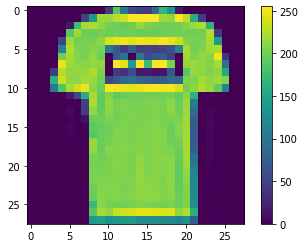

In [40]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [41]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

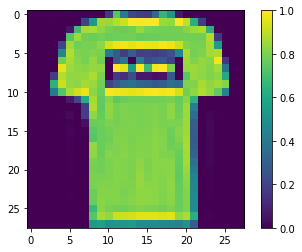

In [42]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [43]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [45]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Building the model

In [46]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

In [47]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLu
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [48]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [49]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Training the Model


In [51]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Training the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7118 - sparse_categorical_accuracy: 0.7521
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4290 - sparse_categorical_accuracy: 0.8456
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3918 - sparse_categorical_accuracy: 0.8576
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3683 - sparse_categorical_accuracy: 0.8642
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3562 - sparse_categorical_accuracy: 0.8691
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - sparse_categorical_accuracy: 0.8745
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3281 - sparse_categorical_accuracy: 0.8775
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3176 - sparse_categorical_accuracy: 0.8819
Epoch 9/10
1875/1875 [==========

Model evaluation and prediction

In [55]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8704


In [58]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8704000115394592


In [59]:
# Model prediction
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [60]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [61]:
y_pred[110], y_test[110] # predicted and actual output

(2, 2)

In [62]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Load']


In [64]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cn = confusion_matrix(y_test,y_pred)
print(cn)

[[799   2  15  17   8   0 146   0  13   0]
 [  2 966   1  23   4   0   2   0   2   0]
 [ 10   2 749   7 174   0  55   0   3   0]
 [ 16   6  13 865  61   0  35   0   4   0]
 [  0   0  62  15 899   0  21   0   3   0]
 [  0   0   0   0   0 977   0  16   2   5]
 [ 94   1  96  24 193   0 576   0  16   0]
 [  0   0   0   0   0  29   0 936   1  34]
 [  2   0   3   3   7   2   3   2 978   0]
 [  1   0   0   1   0  14   0  25   0 959]]


In [65]:
acc_cn = accuracy_score(y_test, y_pred)
print(acc_cn)

0.8704
